# Election Logistic Regression and Decision Tree Models

## By Desmond Cheng

Data Sets obtained from:

Government Data Sets

https://www.ers.usda.gov/data-products/county-level-data-sets/

    1) Educational attainment for the U.S., States, and counties, 1970-2018

    2) Poverty estimates for the U.S., States, and counties, 2019

    3) Population estimates for the U.S., States, and counties, 2010-19

    4) Unemployment and median household income for the U.S., States, and counties, 2000-19

Election Data Set

https://github.com/tonmcg/US_County_Level_Election_Results_08-20/blob/master/2020_US_County_Level_Presidential_Results.csv

## Table of Contents:

1. Importing Libraries and Datasets

2. Dataframes Merging

3. Data Cleaning, Exploratory Data Analysis, and Feature Engineering

4. Data Aggregation

5. Correlation Analysis and Data Visualization

6. Logistic Regression Model

7. Decision Tree Model


Interested in the correlation among educational, economical, and social factors and how they affected voting preferences in the 2020 presidential election, I embarked on a data science project to attempt to find correlation patterns and utilize logistic regression to categorize voters' presidential choice by the aforementioned factors.

## Importing Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import os
import csv
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
import itertools
from pylab import rcParams

In [2]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 20,9
sns.set_style('whitegrid')
sns.set(style="whitegrid", color_codes=True)
plt.rc("font", size=20)

In [4]:
election = pd.read_csv('C:\\Users\\desmo\\AppData\\Local\\Programs\\Python\\Python38-32\\Data Sets\\Election Data\\election_new.csv', encoding='latin-1')

In [5]:
education = pd.read_csv('C:\\Users\\desmo\\AppData\\Local\\Programs\\Python\\Python38-32\\Data Sets\\Election Data\\education_snip.csv',encoding='latin-1')

In [6]:
unemployment = pd.read_csv('C:\\Users\\desmo\\AppData\\Local\\Programs\\Python\\Python38-32\\Data Sets\\Election Data\\unemployment_snip.csv',encoding='latin-1')

In [7]:
poverty = pd.read_csv('C:\\Users\\desmo\\AppData\\Local\\Programs\\Python\\Python38-32\\Data Sets\\Election Data\\PovertyEstimates_Snip.csv',encoding='latin-1')

In [8]:
pop = pd.read_csv('C:\\Users\\desmo\\AppData\\Local\\Programs\\Python\\Python38-32\\Data Sets\\Election Data\\PopulationEstimates_Snip.csv',encoding='latin-1')

In [9]:
election

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff
0,Alabama,1001,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184
1,Alabama,1003,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623
2,Alabama,1005,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631
3,Alabama,1007,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280
4,Alabama,1009,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022
...,...,...,...,...,...,...,...,...,...,...
3147,Wyoming,56037,Sweetwater County,12229,3823,16603,8406,0.736554,0.230260,0.506294
3148,Wyoming,56039,Teton County,4341,9848,14677,-5507,0.295769,0.670982,-0.375213
3149,Wyoming,56041,Uinta County,7496,1591,9402,5905,0.797277,0.169219,0.628058
3150,Wyoming,56043,Washakie County,3245,651,4012,2594,0.808824,0.162263,0.646560


In [10]:
education

,FIPS Code,State,Area name,"Less than a high school diploma, 2014-18","High school diploma only, 2014-18","Some college or associate's degree, 2014-18","Bachelor's degree or higher, 2014-18","Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18"
0,0,US,United States,26948057.0,59265308.0,63365655.0,68867051.0,12.3,27.1,29.0,31.5
1,1000,AL,Alabama,470043.0,1020172.0,987148.0,822595.0,14.2,30.9,29.9,24.9
2,1001,AL,Autauga County,4204.0,12119.0,10552.0,10291.0,11.3,32.6,28.4,27.7
3,1003,AL,Baldwin County,14310.0,40579.0,46025.0,46075.0,9.7,27.6,31.3,31.3
4,1005,AL,Barbour County,4901.0,6486.0,4566.0,2220.0,27.0,35.7,25.1,12.2
...,...,...,...,...,...,...,...,...,...,...,...
3278,72145,PR,Vega Baja Municipio,11578.0,8571.0,9375.0,7715.0,31.1,23.0,25.2,20.7
3279,72147,PR,Vieques Municipio,1576.0,2344.0,1067.0,1295.0,25.1,37.3,17.0,20.6
3280,72149,PR,Villalba Municipio,3733.0,5616.0,2866.0,3073.0,24.4,36.7,18.7,20.1
3281,72151,PR,Yabucoa Municipio,7220.0,5972.0,6281.0,4443.0,30.2,25.0,26.3,18.6


In [11]:
unemployment

,FIPStxt,Stabr,area_name,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018
0,0,US,United States,163100055.0,157115247.0,5984808.0,3.7,61937.0,NaN
1,1000,AL,Alabama,2241747.0,2174483.0,67264.0,3.0,49881.0,100.0
2,1001,AL,"Autauga County, AL",26172.0,25458.0,714.0,2.7,59338.0,119.0
3,1003,AL,"Baldwin County, AL",97328.0,94675.0,2653.0,2.7,57588.0,115.5
4,1005,AL,"Barbour County, AL",8537.0,8213.0,324.0,3.8,34382.0,68.9
...,...,...,...,...,...,...,...,...,...
3270,72145,PR,"Vega Baja Municipio, PR",13037.0,11791.0,1246.0,9.6,NaN,NaN
3271,72147,PR,"Vieques Municipio, PR",2585.0,2406.0,179.0,6.9,NaN,NaN
3272,72149,PR,"Villalba Municipio, PR",7406.0,6231.0,1175.0,15.9,NaN,NaN
3273,72151,PR,"Yabucoa Municipio, PR",8691.0,7552.0,1139.0,13.1,NaN,NaN


In [12]:
poverty

,FIPStxt,Stabr,Area_name,POVALL_2019,PCTPOVALL_2019,MEDHHINC_2019
0,0,US,United States,39490096,12.3,65712
1,1000,AL,Alabama,747478,15.6,51771
2,1001,AL,Autauga County,6723,12.1,58233
3,1003,AL,Baldwin County,22360,10.1,59871
4,1005,AL,Barbour County,5909,27.1,35972
...,...,...,...,...,...,...
3188,56037,WY,Sweetwater County,3453,8.3,80639
3189,56039,WY,Teton County,1396,6.0,98837
3190,56041,WY,Uinta County,1699,8.5,70756
3191,56043,WY,Washakie County,845,11.1,55122


In [13]:
pop

,FIPStxt,State,Area_Name,POP_ESTIMATE_2019,N_POP_CHG_2019,R_birth_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_DOMESTIC_MIG_2019,R_NET_MIG_2019
0,0,US,United States,328239523,1552022.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1000,AL,Alabama,4903185,15504.0,11.7,11.0,0.7,0.6,1.9,2.5
2,1001,AL,Autauga County,55869,336.0,11.2,9.7,1.5,-0.3,4.8,4.6
3,1003,AL,Baldwin County,223234,5379.0,10.4,10.5,-0.1,0.4,24.0,24.4
4,1005,AL,Barbour County,24686,-186.0,10.3,12.6,-2.3,0.5,-5.7,-5.2
...,...,...,...,...,...,...,...,...,...,...,...
3268,72145,PR,"Vega Baja Municipio, Puerto Rico",50023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3269,72147,PR,"Vieques Municipio, Puerto Rico",8386,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3270,72149,PR,"Villalba Municipio, Puerto Rico",21372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3271,72151,PR,"Yabucoa Municipio, Puerto Rico",32282,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dataframes Merging

In [14]:
combined_df = pd.merge(education, unemployment,  how='left', right_on=['FIPStxt'], left_on = ['FIPS Code'])

In [15]:
combined_df = pd.merge(combined_df, pop,  how='left', left_on=['FIPS Code'], right_on = ['FIPStxt'])

In [16]:
combined_df = pd.merge(combined_df, poverty,  how='left', left_on=['FIPS Code'], right_on = ['FIPStxt'])

In [17]:
combined_df

,FIPS Code,State_x,Area name,"Less than a high school diploma, 2014-18","High school diploma only, 2014-18","Some college or associate's degree, 2014-18","Bachelor's degree or higher, 2014-18","Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",FIPStxt_x,Stabr_x,area_name,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,FIPStxt_y,State_y,Area_Name,POP_ESTIMATE_2019,N_POP_CHG_2019,R_birth_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_DOMESTIC_MIG_2019,R_NET_MIG_2019,FIPStxt,Stabr_y,Area_name,POVALL_2019,PCTPOVALL_2019,MEDHHINC_2019
0,0,US,United States,26948057.0,59265308.0,63365655.0,68867051.0,12.3,27.1,29.0,31.5,0.0,US,United States,163100055.0,157115247.0,5984808.0,3.7,61937.0,NaN,0.0,US,United States,328239523.0,1552022.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,US,United States,39490096.0,12.3,65712.0
1,1000,AL,Alabama,470043.0,1020172.0,987148.0,822595.0,14.2,30.9,29.9,24.9,1000.0,AL,Alabama,2241747.0,2174483.0,67264.0,3.0,49881.0,100.0,1000.0,AL,Alabama,4903185.0,15504.0,11.7,11.0,0.7,0.6,1.9,2.5,1000.0,AL,Alabama,747478.0,15.6,51771.0
2,1001,AL,Autauga County,4204.0,12119.0,10552.0,10291.0,11.3,32.6,28.4,27.7,1001.0,AL,"Autauga County, AL",26172.0,25458.0,714.0,2.7,59338.0,119.0,1001.0,AL,Autauga County,55869.0,336.0,11.2,9.7,1.5,-0.3,4.8,4.6,1001.0,AL,Autauga County,6723.0,12.1,58233.0
3,1003,AL,Baldwin County,14310.0,40579.0,46025.0,46075.0,9.7,27.6,31.3,31.3,1003.0,AL,"Baldwin County, AL",97328.0,94675.0,2653.0,2.7,57588.0,115.5,1003.0,AL,Baldwin County,223234.0,5379.0,10.4,10.5,-0.1,0.4,24.0,24.4,1003.0,AL,Baldwin County,22360.0,10.1,59871.0
4,1005,AL,Barbour County,4901.0,6486.0,4566.0,2220.0,27.0,35.7,25.1,12.2,1005.0,AL,"Barbour County, AL",8537.0,8213.0,324.0,3.8,34382.0,68.9,1005.0,AL,Barbour County,24686.0,-186.0,10.3,12.6,-2.3,0.5,-5.7,-5.2,1005.0,AL,Barbour County,5909.0,27.1,35972.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3278,72145,PR,Vega Baja Municipio,11578.0,8571.0,9375.0,7715.0,31.1,23.0,25.2,20.7,72145.0,PR,"Vega Baja Municipio, PR",13037.0,11791.0,1246.0,9.6,NaN,NaN,72145.0,PR,"Vega Baja Municipio, Puerto Rico",50023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3279,72147,PR,Vieques Municipio,1576.0,2344.0,1067.0,1295.0,25.1,37.3,17.0,20.6,72147.0,PR,"Vieques Municipio, PR",2585.0,2406.0,179.0,6.9,NaN,NaN,72147.0,PR,"Vieques Municipio, Puerto Rico",8386.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3280,72149,PR,Villalba Municipio,3733.0,5616.0,2866.0,3073.0,24.4,36.7,18.7,20.1,72149.0,PR,"Villalba Municipio, PR",7406.0,6231.0,1175.0,15.9,NaN,NaN,72149.0,PR,"Villalba Municipio, Puerto Rico",21372.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3281,72151,PR,Yabucoa Municipio,7220.0,5972.0,6281.0,4443.0,30.2,25.0,26.3,18.6,72151.0,PR,"Yabucoa Municipio, PR",8691.0,7552.0,1139.0,13.1,NaN,NaN,72151.0,PR,"Yabucoa Municipio, Puerto Rico",32282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


With all our governmental datasets merged, let's see what columns we have.

In [18]:
combined_df.columns

Index(['FIPS Code', 'State_x', 'Area name',
       'Less than a high school diploma, 2014-18',
       'High school diploma only, 2014-18',
       'Some college or associate's degree, 2014-18',
       'Bachelor's degree or higher, 2014-18',
       'Percent of adults with less than a high school diploma, 2014-18',
       'Percent of adults with a high school diploma only, 2014-18',
       'Percent of adults completing some college or associate's degree, 2014-18',
       'Percent of adults with a bachelor's degree or higher, 2014-18',
       'FIPStxt_x', 'Stabr_x', 'area_name', ' Civilian_labor_force_2019 ',
       ' Employed_2019 ', ' Unemployed_2019 ', 'Unemployment_rate_2019',
       'Median_Household_Income_2018',
       'Med_HH_Income_Percent_of_State_Total_2018', 'FIPStxt_y', 'State_y',
       'Area_Name', 'POP_ESTIMATE_2019', 'N_POP_CHG_2019', 'R_birth_2019',
       'R_death_2019', 'R_NATURAL_INC_2019', 'R_INTERNATIONAL_MIG_2019',
       'R_DOMESTIC_MIG_2019', 'R_NET_MIG_2019', 'FI

Let's drop the duplicate descriptor columns along with the ones that are repetitive. Looking to utilize the columns that best normalizes the data.

In [19]:
combined_df.drop(columns=['FIPStxt',
       'Stabr_y', 'Area_name', 'FIPStxt_x', 'Stabr_x', 'area_name', 'FIPStxt_y', 'State_y',
       'Area_Name', 'Percent of adults completing some college or associate\'s degree, 2014-18', 'R_DOMESTIC_MIG_2019', 'R_birth_2019', ' Civilian_labor_force_2019 ', ' Employed_2019 ', ' Unemployed_2019 ', 'Less than a high school diploma, 2014-18',
       'High school diploma only, 2014-18', 'Some college or associate\'s degree, 2014-18', 'Bachelor\'s degree or higher, 2014-18'], inplace=True)

In [20]:
combined_df

,FIPS Code,State_x,Area name,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Unemployment_rate_2019,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,POP_ESTIMATE_2019,N_POP_CHG_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_NET_MIG_2019,POVALL_2019,PCTPOVALL_2019,MEDHHINC_2019
0,0,US,United States,12.3,27.1,31.5,3.7,61937.0,NaN,328239523.0,1552022.0,NaN,NaN,NaN,NaN,39490096.0,12.3,65712.0
1,1000,AL,Alabama,14.2,30.9,24.9,3.0,49881.0,100.0,4903185.0,15504.0,11.0,0.7,0.6,2.5,747478.0,15.6,51771.0
2,1001,AL,Autauga County,11.3,32.6,27.7,2.7,59338.0,119.0,55869.0,336.0,9.7,1.5,-0.3,4.6,6723.0,12.1,58233.0
3,1003,AL,Baldwin County,9.7,27.6,31.3,2.7,57588.0,115.5,223234.0,5379.0,10.5,-0.1,0.4,24.4,22360.0,10.1,59871.0
4,1005,AL,Barbour County,27.0,35.7,12.2,3.8,34382.0,68.9,24686.0,-186.0,12.6,-2.3,0.5,-5.2,5909.0,27.1,35972.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3278,72145,PR,Vega Baja Municipio,31.1,23.0,20.7,9.6,NaN,NaN,50023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3279,72147,PR,Vieques Municipio,25.1,37.3,20.6,6.9,NaN,NaN,8386.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3280,72149,PR,Villalba Municipio,24.4,36.7,20.1,15.9,NaN,NaN,21372.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3281,72151,PR,Yabucoa Municipio,30.2,25.0,18.6,13.1,NaN,NaN,32282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's analyze the columns we have; the data types and the amount of null values.

In [21]:
info = pd.DataFrame(combined_df.dtypes).T.rename(index = {0: 'Column Type'})
info = info.append(pd.DataFrame(combined_df.isnull().sum()).T.rename(index = {0: 'null values (nb)'}))
info = info.append((pd.DataFrame(combined_df.isnull().sum()/combined_df.shape[0]*100).round(1)).T.rename(index = {0:'null values {%}'}))
info

,FIPS Code,State_x,Area name,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Unemployment_rate_2019,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,POP_ESTIMATE_2019,N_POP_CHG_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_NET_MIG_2019,POVALL_2019,PCTPOVALL_2019,MEDHHINC_2019
Column Type,int64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
null values (nb),0,0,0,10,10,10,11,90,91,10,89,90,90,90,90,90,90,90
null values {%},0,0,0,0.3,0.3,0.3,0.3,2.7,2.8,0.3,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7


We can see we have some null values; 91 total for 2.8% of Med_HH_Income_Percent_of_State_Total_2018. Let's see what they are.

In [22]:
combined_df.loc[combined_df['Med_HH_Income_Percent_of_State_Total_2018'].isnull()]

,FIPS Code,State_x,Area name,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Unemployment_rate_2019,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,POP_ESTIMATE_2019,N_POP_CHG_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_NET_MIG_2019,POVALL_2019,PCTPOVALL_2019,MEDHHINC_2019
0,0,US,United States,12.3,27.1,31.5,3.7,61937.0,NaN,328239523.0,1552022.0,NaN,NaN,NaN,NaN,39490096.0,12.3,65712.0
70,2010,AK,Aleutian Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,2160,AK,Kuskokwim Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,2201,AK,Prince of Wales-Outer Ketchikan Census Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,2231,AK,Skagway-Yakutat-Angoon Census Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3278,72145,PR,Vega Baja Municipio,31.1,23.0,20.7,9.6,NaN,NaN,50023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3279,72147,PR,Vieques Municipio,25.1,37.3,20.6,6.9,NaN,NaN,8386.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3280,72149,PR,Villalba Municipio,24.4,36.7,20.1,15.9,NaN,NaN,21372.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3281,72151,PR,Yabucoa Municipio,30.2,25.0,18.6,13.1,NaN,NaN,32282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Puerto Rico and Alaska are our states that have missing values. As Puerto Rico isn't relevant to our analysis due to not being able to vote during the Presidential Elections and Alaska only making up a very miniscule percentage of our votes as we'll see later, let's drop them from our dataframe.

In [23]:
combined_df.dropna(subset = ['Med_HH_Income_Percent_of_State_Total_2018'], inplace=True)

In [24]:
combined_df.isnull().sum()

FIPS Code                                                          0
State_x                                                            0
Area name                                                          0
Percent of adults with less than a high school diploma, 2014-18    0
Percent of adults with a high school diploma only, 2014-18         0
Percent of adults with a bachelor's degree or higher, 2014-18      0
Unemployment_rate_2019                                             0
Median_Household_Income_2018                                       0
Med_HH_Income_Percent_of_State_Total_2018                          0
POP_ESTIMATE_2019                                                  0
N_POP_CHG_2019                                                     0
R_death_2019                                                       0
R_NATURAL_INC_2019                                                 0
R_INTERNATIONAL_MIG_2019                                           0
R_NET_MIG_2019                    

Now that we got all the government data sets imported, merged, and cleaned, let's take a look at our final data set for the election votes by county level and merge it with our government data frame.

In [25]:
election

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff
0,Alabama,1001,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184
1,Alabama,1003,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623
2,Alabama,1005,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631
3,Alabama,1007,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280
4,Alabama,1009,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022
...,...,...,...,...,...,...,...,...,...,...
3147,Wyoming,56037,Sweetwater County,12229,3823,16603,8406,0.736554,0.230260,0.506294
3148,Wyoming,56039,Teton County,4341,9848,14677,-5507,0.295769,0.670982,-0.375213
3149,Wyoming,56041,Uinta County,7496,1591,9402,5905,0.797277,0.169219,0.628058
3150,Wyoming,56043,Washakie County,3245,651,4012,2594,0.808824,0.162263,0.646560


In [26]:
df = pd.merge(election, combined_df,  how='left', left_on=['county_fips'], right_on = ['FIPS Code'])

In [27]:
df

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,FIPS Code,State_x,Area name,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Unemployment_rate_2019,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,POP_ESTIMATE_2019,N_POP_CHG_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_NET_MIG_2019,POVALL_2019,PCTPOVALL_2019,MEDHHINC_2019
0,Alabama,1001,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184,1001.0,AL,Autauga County,11.3,32.6,27.7,2.7,59338.0,119.0,55869.0,336.0,9.7,1.5,-0.3,4.6,6723.0,12.1,58233.0
1,Alabama,1003,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623,1003.0,AL,Baldwin County,9.7,27.6,31.3,2.7,57588.0,115.5,223234.0,5379.0,10.5,-0.1,0.4,24.4,22360.0,10.1,59871.0
2,Alabama,1005,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631,1005.0,AL,Barbour County,27.0,35.7,12.2,3.8,34382.0,68.9,24686.0,-186.0,12.6,-2.3,0.5,-5.2,5909.0,27.1,35972.0
3,Alabama,1007,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280,1007.0,AL,Bibb County,16.8,47.3,11.5,3.1,46064.0,92.3,22394.0,27.0,11.3,-0.5,0.4,1.8,4101.0,20.3,47918.0
4,Alabama,1009,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022,1009.0,AL,Blount County,19.8,34.0,12.6,2.7,50412.0,101.1,57826.0,55.0,11.4,-0.1,0.1,1.1,9324.0,16.3,52902.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3147,Wyoming,56037,Sweetwater County,12229,3823,16603,8406,0.736554,0.230260,0.506294,56037.0,WY,Sweetwater County,9.0,33.3,22.0,3.9,73315.0,117.8,42343.0,-515.0,7.0,4.9,0.5,-17.1,3453.0,8.3,80639.0
3148,Wyoming,56039,Teton County,4341,9848,14677,-5507,0.295769,0.670982,-0.375213,56039.0,WY,Teton County,5.6,13.2,57.4,2.7,99087.0,159.2,23464.0,195.0,3.2,6.5,3.4,1.8,1396.0,6.0,98837.0
3149,Wyoming,56041,Uinta County,7496,1591,9402,5905,0.797277,0.169219,0.628058,56041.0,WY,Uinta County,7.2,40.1,15.4,3.9,63401.0,101.8,20226.0,-66.0,6.7,5.9,0.0,-9.2,1699.0,8.5,70756.0
3150,Wyoming,56043,Washakie County,3245,651,4012,2594,0.808824,0.162263,0.646560,56043.0,WY,Washakie County,10.4,30.3,21.5,3.9,55190.0,88.6,7805.0,-72.0,11.5,-0.9,-0.6,-8.3,845.0,11.1,55122.0


## Data Cleaning, Exploratory Data Analysis, and Feature Engineering

Before we get any further, as some of the column names are confusing, here is a glossary of terms for the less intuitive ones.

### Glossary

Unemployment_rate_2019 = Unemployment rate, 2019

Median_Household_Income_2018 = Estimate of Median household Income, 2018

Med_HH_Income_Percent_of_State_Total_2018 = County Household Median Income as a percent of the State Total Median Household Income, 2018

POP_ESTIMATE_2019 = 7/1/2019 resident total population estimate

N_POP_CHG_2019 = Numeric Change in resident total population 7/1/2018 to 7/1/2019

R_death_2019 = Death rate in period 7/1/2018 to 6/30/2019

R_NATURAL_INC_2019 = Natural increase rate in period 7/1/2018 to 6/30/2019

R_INTERNATIONAL_MIG_2019 = Net international migration rate in period 7/1/2018 to 6/30/2019

R_NET_MIG_2019 = Net migration rate in period 7/1/2018 to 6/30/2019

POVALL_2019 = Estimate of people of all ages in poverty 2019

PCTPOVALL_2019 = Estimated percent of people of all ages in poverty 2019

MEDHHINC_2019 = Estimate of median household income 2019

In [28]:
print(df.columns)

Index(['state_name', 'county_fips', 'county_name', 'votes_gop', 'votes_dem',
       'total_votes', 'diff', 'per_gop', 'per_dem', 'per_point_diff',
       'FIPS Code', 'State_x', 'Area name',
       'Percent of adults with less than a high school diploma, 2014-18',
       'Percent of adults with a high school diploma only, 2014-18',
       'Percent of adults with a bachelor's degree or higher, 2014-18',
       'Unemployment_rate_2019', 'Median_Household_Income_2018',
       'Med_HH_Income_Percent_of_State_Total_2018', 'POP_ESTIMATE_2019',
       'N_POP_CHG_2019', 'R_death_2019', 'R_NATURAL_INC_2019',
       'R_INTERNATIONAL_MIG_2019', 'R_NET_MIG_2019', 'POVALL_2019',
       'PCTPOVALL_2019', 'MEDHHINC_2019'],
      dtype='object')


In [29]:
df.drop(columns=['State_x', 'Area name', 'county_fips'], inplace=True)

In [30]:
df

,state_name,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,FIPS Code,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Unemployment_rate_2019,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,POP_ESTIMATE_2019,N_POP_CHG_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_NET_MIG_2019,POVALL_2019,PCTPOVALL_2019,MEDHHINC_2019
0,Alabama,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184,1001.0,11.3,32.6,27.7,2.7,59338.0,119.0,55869.0,336.0,9.7,1.5,-0.3,4.6,6723.0,12.1,58233.0
1,Alabama,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623,1003.0,9.7,27.6,31.3,2.7,57588.0,115.5,223234.0,5379.0,10.5,-0.1,0.4,24.4,22360.0,10.1,59871.0
2,Alabama,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631,1005.0,27.0,35.7,12.2,3.8,34382.0,68.9,24686.0,-186.0,12.6,-2.3,0.5,-5.2,5909.0,27.1,35972.0
3,Alabama,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280,1007.0,16.8,47.3,11.5,3.1,46064.0,92.3,22394.0,27.0,11.3,-0.5,0.4,1.8,4101.0,20.3,47918.0
4,Alabama,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022,1009.0,19.8,34.0,12.6,2.7,50412.0,101.1,57826.0,55.0,11.4,-0.1,0.1,1.1,9324.0,16.3,52902.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3147,Wyoming,Sweetwater County,12229,3823,16603,8406,0.736554,0.230260,0.506294,56037.0,9.0,33.3,22.0,3.9,73315.0,117.8,42343.0,-515.0,7.0,4.9,0.5,-17.1,3453.0,8.3,80639.0
3148,Wyoming,Teton County,4341,9848,14677,-5507,0.295769,0.670982,-0.375213,56039.0,5.6,13.2,57.4,2.7,99087.0,159.2,23464.0,195.0,3.2,6.5,3.4,1.8,1396.0,6.0,98837.0
3149,Wyoming,Uinta County,7496,1591,9402,5905,0.797277,0.169219,0.628058,56041.0,7.2,40.1,15.4,3.9,63401.0,101.8,20226.0,-66.0,6.7,5.9,0.0,-9.2,1699.0,8.5,70756.0
3150,Wyoming,Washakie County,3245,651,4012,2594,0.808824,0.162263,0.646560,56043.0,10.4,30.3,21.5,3.9,55190.0,88.6,7805.0,-72.0,11.5,-0.9,-0.6,-8.3,845.0,11.1,55122.0


Let's confirm the election data to an independent source as we obtained that dataset from Github. The other data we obtained from government sources so we have assurance over their validity.

Let's confirm to https://www.nbcnews.com/politics/2020-elections/president-results

NBC News reports 158,431,190 total votes with Democrats securing 51.3% of the popular vote and Republicans securing 46.8%. Let's compare to our data set.

In [31]:
df['total_votes'].sum()

158433557

In [32]:
(df['votes_dem'].sum() / df['total_votes'].sum()).round(3)

0.513

In [33]:
(df['votes_gop'].sum() / df['total_votes'].sum()).round(3)

0.468

We can see our data set has an extra 2,367 votes than NBC News. However, NBC reported 99% of the expected vote so the difference is likely due to a timing difference. That is a very minor difference and won't have an impact on our analysis. Comparing to the voting percentages each party obtained, we can see they match NBC News'. We can feel confident in the validity of our data.

Let's take a look at our column statistics now.

In [34]:
info = pd.DataFrame(df.dtypes).T.rename(index = {0: 'Column Type'})
info = info.append(pd.DataFrame(df.isnull().sum()).T.rename(index = {0: 'null values (nb)'}))
info = info.append((pd.DataFrame(df.isnull().sum()/df.shape[0]*100).round(1)).T.rename(index = {0:'null values {%}'}))
info

,state_name,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,FIPS Code,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Unemployment_rate_2019,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,POP_ESTIMATE_2019,N_POP_CHG_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_NET_MIG_2019,POVALL_2019,PCTPOVALL_2019,MEDHHINC_2019
Column Type,object,object,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
null values (nb),0,0,0,0,0,0,0,0,0,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40
null values {%},0,0,0,0,0,0,0,0,0,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3


We see there are 40 missing values for some of the columns which is 1.3% of the values. Let's see what they are and how many votes they equate to.

In [35]:
df['total_votes'][df['Percent of adults with less than a high school diploma, 2014-18'].isnull()].sum()

391346

In [36]:
df['total_votes'][df['Percent of adults with less than a high school diploma, 2014-18'].isnull()].sum() / df['total_votes'].sum()

0.002470095397782428

The percentage of votes our missing data points has is very minisule and won't impact our analysis. Let's see what they are.

In [37]:
df.loc[df['Percent of adults with less than a high school diploma, 2014-18'].isnull()]

,state_name,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,FIPS Code,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Unemployment_rate_2019,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,POP_ESTIMATE_2019,N_POP_CHG_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_NET_MIG_2019,POVALL_2019,PCTPOVALL_2019,MEDHHINC_2019
67,Alaska,District 1,3511,3477,7360,34,0.477038,0.472418,0.004620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Alaska,District 2,3674,2104,6161,1570,0.596332,0.341503,0.254829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,Alaska,District 3,6076,1903,8385,4173,0.724627,0.226953,0.497674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,Alaska,District 4,4690,5345,10587,-655,0.442996,0.504864,-0.061868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Alaska,District 5,4077,4204,8706,-127,0.468298,0.482885,-0.014588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,Alaska,District 6,5770,3272,9518,2498,0.606220,0.343770,0.262450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,Alaska,District 7,7027,2215,9664,4812,0.727132,0.229201,0.497930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,Alaska,District 8,7618,1953,9957,5665,0.765090,0.196143,0.568946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,Alaska,District 9,7787,2769,11047,5018,0.704897,0.250656,0.454241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,Alaska,District 10,8081,2727,11256,5354,0.717928,0.242271,0.475657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


All for Alaska which we saw earlier our government data sets didn't have information for. Let's just drop them as the total votes is a very small percentage and won't impact our final conclusion.

In [38]:
df.dropna(subset = ['Percent of adults with less than a high school diploma, 2014-18'], inplace=True)

In [39]:
df[df['Percent of adults with less than a high school diploma, 2014-18'].isnull()]['total_votes'].sum()

0

In [40]:
df.isnull().sum()

state_name                                                         0
county_name                                                        0
votes_gop                                                          0
votes_dem                                                          0
total_votes                                                        0
diff                                                               0
per_gop                                                            0
per_dem                                                            0
per_point_diff                                                     0
FIPS Code                                                          0
Percent of adults with less than a high school diploma, 2014-18    0
Percent of adults with a high school diploma only, 2014-18         0
Percent of adults with a bachelor's degree or higher, 2014-18      0
Unemployment_rate_2019                                             0
Median_Household_Income_2018      

Let's add a new column for the county winner using the existing voting percentage columns.

In [41]:
df['County Winner'] = np.where(df['votes_gop'] > df['votes_dem'], 'Republican', 'Democrat')

In [42]:
df

,state_name,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,FIPS Code,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Unemployment_rate_2019,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,POP_ESTIMATE_2019,N_POP_CHG_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_NET_MIG_2019,POVALL_2019,PCTPOVALL_2019,MEDHHINC_2019,County Winner
0,Alabama,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184,1001.0,11.3,32.6,27.7,2.7,59338.0,119.0,55869.0,336.0,9.7,1.5,-0.3,4.6,6723.0,12.1,58233.0,Republican
1,Alabama,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623,1003.0,9.7,27.6,31.3,2.7,57588.0,115.5,223234.0,5379.0,10.5,-0.1,0.4,24.4,22360.0,10.1,59871.0,Republican
2,Alabama,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631,1005.0,27.0,35.7,12.2,3.8,34382.0,68.9,24686.0,-186.0,12.6,-2.3,0.5,-5.2,5909.0,27.1,35972.0,Republican
3,Alabama,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280,1007.0,16.8,47.3,11.5,3.1,46064.0,92.3,22394.0,27.0,11.3,-0.5,0.4,1.8,4101.0,20.3,47918.0,Republican
4,Alabama,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022,1009.0,19.8,34.0,12.6,2.7,50412.0,101.1,57826.0,55.0,11.4,-0.1,0.1,1.1,9324.0,16.3,52902.0,Republican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3147,Wyoming,Sweetwater County,12229,3823,16603,8406,0.736554,0.230260,0.506294,56037.0,9.0,33.3,22.0,3.9,73315.0,117.8,42343.0,-515.0,7.0,4.9,0.5,-17.1,3453.0,8.3,80639.0,Republican
3148,Wyoming,Teton County,4341,9848,14677,-5507,0.295769,0.670982,-0.375213,56039.0,5.6,13.2,57.4,2.7,99087.0,159.2,23464.0,195.0,3.2,6.5,3.4,1.8,1396.0,6.0,98837.0,Democrat
3149,Wyoming,Uinta County,7496,1591,9402,5905,0.797277,0.169219,0.628058,56041.0,7.2,40.1,15.4,3.9,63401.0,101.8,20226.0,-66.0,6.7,5.9,0.0,-9.2,1699.0,8.5,70756.0,Republican
3150,Wyoming,Washakie County,3245,651,4012,2594,0.808824,0.162263,0.646560,56043.0,10.4,30.3,21.5,3.9,55190.0,88.6,7805.0,-72.0,11.5,-0.9,-0.6,-8.3,845.0,11.1,55122.0,Republican


Let's now turn that new County Winner column into binary values which are necessary for logistic regression. 0 will be the column value for False while 1 will be True.

In [43]:
df = pd.get_dummies(df, columns=['County Winner'])

In [44]:
df

,state_name,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,FIPS Code,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Unemployment_rate_2019,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,POP_ESTIMATE_2019,N_POP_CHG_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_NET_MIG_2019,POVALL_2019,PCTPOVALL_2019,MEDHHINC_2019,County Winner_Democrat,County Winner_Republican
0,Alabama,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184,1001.0,11.3,32.6,27.7,2.7,59338.0,119.0,55869.0,336.0,9.7,1.5,-0.3,4.6,6723.0,12.1,58233.0,0,1
1,Alabama,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623,1003.0,9.7,27.6,31.3,2.7,57588.0,115.5,223234.0,5379.0,10.5,-0.1,0.4,24.4,22360.0,10.1,59871.0,0,1
2,Alabama,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631,1005.0,27.0,35.7,12.2,3.8,34382.0,68.9,24686.0,-186.0,12.6,-2.3,0.5,-5.2,5909.0,27.1,35972.0,0,1
3,Alabama,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280,1007.0,16.8,47.3,11.5,3.1,46064.0,92.3,22394.0,27.0,11.3,-0.5,0.4,1.8,4101.0,20.3,47918.0,0,1
4,Alabama,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022,1009.0,19.8,34.0,12.6,2.7,50412.0,101.1,57826.0,55.0,11.4,-0.1,0.1,1.1,9324.0,16.3,52902.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3147,Wyoming,Sweetwater County,12229,3823,16603,8406,0.736554,0.230260,0.506294,56037.0,9.0,33.3,22.0,3.9,73315.0,117.8,42343.0,-515.0,7.0,4.9,0.5,-17.1,3453.0,8.3,80639.0,0,1
3148,Wyoming,Teton County,4341,9848,14677,-5507,0.295769,0.670982,-0.375213,56039.0,5.6,13.2,57.4,2.7,99087.0,159.2,23464.0,195.0,3.2,6.5,3.4,1.8,1396.0,6.0,98837.0,1,0
3149,Wyoming,Uinta County,7496,1591,9402,5905,0.797277,0.169219,0.628058,56041.0,7.2,40.1,15.4,3.9,63401.0,101.8,20226.0,-66.0,6.7,5.9,0.0,-9.2,1699.0,8.5,70756.0,0,1
3150,Wyoming,Washakie County,3245,651,4012,2594,0.808824,0.162263,0.646560,56043.0,10.4,30.3,21.5,3.9,55190.0,88.6,7805.0,-72.0,11.5,-0.9,-0.6,-8.3,845.0,11.1,55122.0,0,1


In [45]:
df.describe()

,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,FIPS Code,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Unemployment_rate_2019,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,POP_ESTIMATE_2019,N_POP_CHG_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_NET_MIG_2019,POVALL_2019,PCTPOVALL_2019,MEDHHINC_2019,County Winner_Democrat,County Winner_Republican
count,3.112000e+03,3.112000e+03,3.112000e+03,3.112000e+03,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3.112000e+03,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3.112000e+03,3112.000000,3112.000000,3112.000000,3112.000000
mean,2.378480e+04,2.606414e+04,5.078477e+04,-2.279333e+03,0.649733,0.332732,0.317001,30651.696979,13.441163,34.282584,21.558419,3.960925,52685.896530,89.475835,1.052403e+05,499.876607,10.439460,0.536375,0.627346,0.371851,1.266615e+04,14.470662,55602.652956,0.172879,0.827121
std,5.434351e+04,9.751912e+04,1.502648e+05,5.622371e+04,0.161274,0.159812,0.320995,14984.651238,6.341393,7.185602,9.435754,1.390290,13837.630876,20.093568,3.349233e+05,2978.156191,2.651288,3.904841,1.405340,12.307187,4.274862e+04,5.793896,14451.719339,0.378204,0.378204
min,6.000000e+01,4.000000e+00,6.600000e+01,-1.883355e+06,0.053973,0.030909,-0.867524,1001.000000,1.200000,5.500000,0.000000,0.700000,25385.000000,43.900000,1.690000e+02,-34799.000000,0.000000,-13.500000,-1.700000,-165.400000,1.200000e+01,2.700000,24732.000000,0.000000,0.000000
25%,3.675500e+03,1.299500e+03,5.354500e+03,8.545000e+02,0.557561,0.209081,0.134839,19038.500000,8.800000,29.800000,15.000000,3.000000,43650.000000,76.200000,1.113550e+04,-97.000000,8.800000,-2.000000,0.000000,-5.300000,1.558500e+03,10.400000,46181.000000,0.000000,1.000000
50%,8.295500e+03,3.690000e+03,1.254900e+04,3.033500e+03,0.682912,0.299773,0.384381,29208.000000,12.100000,34.600000,19.200000,3.700000,50529.500000,86.900000,2.616300e+04,6.000000,10.500000,0.300000,0.200000,-0.100000,3.644500e+03,13.400000,53257.000000,0.000000,1.000000
75%,2.079925e+04,1.215275e+04,3.365100e+04,7.377000e+03,0.774676,0.423605,0.566232,46005.500000,17.200000,39.300000,25.600000,4.600000,58643.250000,99.200000,6.857625e+04,239.000000,12.200000,2.700000,0.800000,5.925000,8.984000e+03,17.500000,61810.750000,0.000000,1.000000
max,1.145530e+06,3.028885e+06,4.263443e+06,1.190050e+05,0.961818,0.921497,0.930909,56045.000000,66.300000,55.600000,78.500000,18.300000,140382.000000,263.600000,1.003911e+07,83011.000000,22.100000,24.400000,26.000000,126.200000,1.319242e+06,47.700000,151806.000000,1.000000,1.000000


## Data Aggregation

Let's begin aggregating our data set in order to analyze based on different levels. Let's begin with state level.

In [46]:
state_group = df.groupby('state_name').agg({"votes_gop":"sum"
                                            ,"votes_dem":"sum"
                                            ,"total_votes":"sum"
                                            ,"diff":"sum"
                                           ,'per_gop': "sum", 'per_dem':"sum", 'per_point_diff':"sum",
       'Percent of adults with less than a high school diploma, 2014-18':"mean",
       'Percent of adults with a high school diploma only, 2014-18':"mean",
       'Percent of adults with a bachelor\'s degree or higher, 2014-18':"mean",
        'Unemployment_rate_2019': 'mean', 'Median_Household_Income_2018': 'mean', 'Med_HH_Income_Percent_of_State_Total_2018': 'mean', 'POP_ESTIMATE_2019': 'mean',  'N_POP_CHG_2019': 'mean',
       'R_death_2019': 'mean', 'R_NATURAL_INC_2019': 'mean', 'R_INTERNATIONAL_MIG_2019': 'mean', 'R_NET_MIG_2019': 'mean',
       'POVALL_2019': 'mean','PCTPOVALL_2019': 'mean', 'MEDHHINC_2019': 'mean', 'County Winner_Democrat':"sum",
       'County Winner_Republican':"sum"}).sort_index()

state_group

,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Unemployment_rate_2019,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,POP_ESTIMATE_2019,N_POP_CHG_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_NET_MIG_2019,POVALL_2019,PCTPOVALL_2019,MEDHHINC_2019,County Winner_Democrat,County Winner_Republican
state_name,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,1441168,849648,2323304,591520,43.373043,22.957384,20.415659,17.792537,35.841791,17.707463,3.446269,43479.820896,87.167164,73181.865672,231.402985,12.214925,-1.053731,0.343284,-1.044776,11156.402985,18.664179,46146.447761,13,54
Arizona,1661686,1672143,3387326,-10457,8.230850,6.537909,1.692941,15.946667,28.280000,20.066667,6.446667,49105.866667,83.120000,485247.800000,8046.200000,9.886667,1.480000,0.826667,8.513333,64200.400000,17.946667,51517.266667,5,10
Arkansas,760647,423932,1219069,336715,51.639801,21.152428,30.487373,16.182667,38.714667,16.185333,4.184000,41801.373333,88.764000,40237.386667,107.613333,12.262667,-1.026667,-0.069333,-2.416000,6247.666667,18.860000,44090.360000,8,67
California,6005961,11109764,17495906,-5103803,25.484539,31.149928,-5.665389,15.586207,23.520690,26.829310,5.098276,67098.655172,89.168966,681245.224138,873.017241,8.332759,2.689655,0.810345,-0.053448,78627.896552,13.020690,71038.379310,35,23
Colorado,1364607,1804352,3256953,-439745,35.808159,26.703888,9.104271,9.145312,27.196875,31.556250,2.843750,59599.671875,82.837500,89980.250000,1053.890625,7.581250,1.768750,1.209375,4.509375,8302.000000,12.889063,62660.468750,24,40
Connecticut,715291,1080680,1824280,-365389,3.396605,4.462930,-1.066325,8.575000,28.200000,36.912500,3.625000,77438.625000,101.412500,445660.875000,-779.125000,8.900000,0.062500,2.537500,-2.237500,42887.625000,9.125000,79180.125000,6,2
Delaware,200603,296268,504010,-95665,1.329111,1.628210,-0.299099,11.233333,32.200000,28.666667,3.900000,61454.333333,93.900000,324588.000000,2761.666667,10.200000,0.800000,0.033333,11.000000,35408.666667,11.733333,66573.000000,2,1
District of Columbia,18586,317323,344356,-298737,0.053973,0.921497,-0.867524,9.400000,17.200000,57.600000,5.500000,82533.000000,100.000000,705749.000000,4202.000000,8.100000,5.400000,3.700000,0.600000,94985.000000,14.100000,90395.000000,1,0
Florida,5668731,5297045,11067456,371686,42.452528,23.946423,18.506105,14.635821,33.874627,21.986567,3.477612,50621.104478,91.316418,320563.238806,3483.880597,11.061194,-1.340299,1.391045,9.553731,40027.313433,15.047761,54289.970149,12,55


Let's pull some queries on certain catagories. Let's start with the state with the largest percentage of adults with bachelor's degree or higher.

In [47]:
state_group.loc[state_group['Percent of adults with a bachelor\'s degree or higher, 2014-18'] == state_group['Percent of adults with a bachelor\'s degree or higher, 2014-18'].max()]

,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Unemployment_rate_2019,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,POP_ESTIMATE_2019,N_POP_CHG_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_NET_MIG_2019,POVALL_2019,PCTPOVALL_2019,MEDHHINC_2019,County Winner_Democrat,County Winner_Republican
state_name,,,,,,,,,,,,,,,,,,,,,,,,
District of Columbia,18586,317323,344356,-298737,0.053973,0.921497,-0.867524,9.4,17.2,57.6,5.5,82533.0,100.0,705749.0,4202.0,8.1,5.4,3.7,0.6,94985.0,14.1,90395.0,1,0


It is District of Columbia with 57.6%. Let's see how much greater that is than the country average.

In [48]:
state_group['Percent of adults with a bachelor\'s degree or higher, 2014-18'].max() - state_group['Percent of adults with a bachelor\'s degree or higher, 2014-18'].mean()

32.85174377526951

Wow almost 33% greater! Our Nation's Capital is highly educated. Let's pull some more stats. Let's see what is the state of the highest death rate.

In [49]:
state_group.loc[state_group['R_death_2019'] == state_group['R_death_2019'].max()]

,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Unemployment_rate_2019,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,POP_ESTIMATE_2019,N_POP_CHG_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_NET_MIG_2019,POVALL_2019,PCTPOVALL_2019,MEDHHINC_2019,County Winner_Democrat,County Winner_Republican
state_name,,,,,,,,,,,,,,,,,,,,,,,,
West Virginia,545382,235984,794652,309398,40.777087,13.384018,27.39307,15.276364,44.178182,16.390909,5.758182,43184.236364,98.067273,32584.490909,-220.8,12.974545,-3.572727,-0.134545,-5.349091,5112.254545,17.183636,46636.363636,0,55


That will be West Virginia at 12.97%. Let's see how much greater that is than the country's average.

In [50]:
state_group['R_death_2019'].max() - state_group['R_death_2019'].mean()

2.8231773280785077

Amount 3% greater. Interesting. Let's see later if we can find any correlations between a high death rate and our other factors.

In [51]:
df.loc[df['county_name'] == 'San Mateo County']

,state_name,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,FIPS Code,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Unemployment_rate_2019,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,POP_ESTIMATE_2019,N_POP_CHG_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_NET_MIG_2019,POVALL_2019,PCTPOVALL_2019,MEDHHINC_2019,County Winner_Democrat,County Winner_Republican
237,California,San Mateo County,75563,291410,374138,-215847,0.201966,0.778884,-0.576918,6081.0,10.8,15.0,49.9,2.0,122930.0,163.4,766573.0,-2108.0,6.8,4.2,4.7,-7.0,46328.0,6.1,135234.0,1,0


Grouping by our dummy variable account for Democrats, we can see the average statistics for when Democrats won the county, 1, and when Republicans won the county, 0.

In [52]:
df.groupby('County Winner_Democrat').agg({"votes_gop":"sum"
                                            ,"votes_dem":"sum"
                                            ,"total_votes":"sum"
                                            ,"diff":"sum"
                                           ,'per_gop': "sum", 'per_dem':"sum", 'per_point_diff':"sum",
       'Percent of adults with less than a high school diploma, 2014-18':"mean",
       'Percent of adults with a high school diploma only, 2014-18':"mean",
       'Percent of adults with a bachelor\'s degree or higher, 2014-18':"mean",
        'Unemployment_rate_2019': 'mean', 'Median_Household_Income_2018': 'mean', 'Med_HH_Income_Percent_of_State_Total_2018': 'mean', 'POP_ESTIMATE_2019': 'mean',  'N_POP_CHG_2019': 'mean',
       'R_death_2019': 'mean', 'R_NATURAL_INC_2019': 'mean', 'R_INTERNATIONAL_MIG_2019': 'mean', 'R_NET_MIG_2019': 'mean',
       'POVALL_2019': 'mean','PCTPOVALL_2019': 'mean', 'MEDHHINC_2019': 'mean'}).sort_index()

,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Unemployment_rate_2019,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,POP_ESTIMATE_2019,N_POP_CHG_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_NET_MIG_2019,POVALL_2019,PCTPOVALL_2019,MEDHHINC_2019
County Winner_Democrat,,,,,,,,,,,,,,,,,,,,,,
0,40518970,22177703,63845365,18341267,1820.53645,709.381068,1111.155382,13.575097,35.688578,19.595571,3.921717,51425.313908,88.891026,50521.475136,341.748640,10.708236,0.233683,0.442308,0.73174,6119.406760,14.205672,54309.947941
1,33499334,58933886,94196846,-25434552,201.43209,326.079661,-124.647571,12.800372,27.555762,30.949442,4.148513,58717.011152,92.273792,367036.459108,1256.421933,9.153532,1.984572,1.512639,-1.35000,43988.312268,15.738476,61787.453532


Looking at the aggregate, statistics that stick out in counties where Democrats won include a higher Percent of adults with a bachelor's degree or higher, 2014-18, Median_Household_Income_2018, and POVALL_2019. In the next section, let's analyze at the county level if there are any correlations.

## Correlation Analysis and Data Visualization

Let's begin analyzing the correlations among educational, economical, and social factors and how they affected voting preferences.

In [53]:
corr_list = df[{'per_gop', 'per_dem',
       'Percent of adults with less than a high school diploma, 2014-18',
       'Percent of adults with a high school diploma only, 2014-18',
       'Percent of adults with a bachelor\'s degree or higher, 2014-18',
       'Unemployment_rate_2019', 'Median_Household_Income_2018', 'Med_HH_Income_Percent_of_State_Total_2018', 'POP_ESTIMATE_2019',  'N_POP_CHG_2019',
       'R_death_2019', 'R_NATURAL_INC_2019', 'R_INTERNATIONAL_MIG_2019', 'R_NET_MIG_2019',
       'POVALL_2019','PCTPOVALL_2019', 'MEDHHINC_2019'}]

correlation = corr_list.corr()

In [54]:
correlation.style.background_gradient(cmap='coolwarm').set_precision(2)

,MEDHHINC_2019,per_dem,PCTPOVALL_2019,"Percent of adults with less than a high school diploma, 2014-18",Unemployment_rate_2019,Median_Household_Income_2018,"Percent of adults with a bachelor's degree or higher, 2014-18",Med_HH_Income_Percent_of_State_Total_2018,N_POP_CHG_2019,R_death_2019,R_INTERNATIONAL_MIG_2019,POVALL_2019,per_gop,"Percent of adults with a high school diploma only, 2014-18",R_NET_MIG_2019,POP_ESTIMATE_2019,R_NATURAL_INC_2019
MEDHHINC_2019,1.00,0.26,-0.77,-0.53,-0.43,0.98,0.71,0.81,0.22,-0.54,0.21,0.16,-0.27,-0.54,0.26,0.29,0.36
per_dem,0.26,1.00,0.07,-0.11,0.13,0.26,0.53,0.11,0.12,-0.22,0.29,0.34,-1.00,-0.48,-0.03,0.36,0.16
PCTPOVALL_2019,-0.77,0.07,1.00,0.64,0.54,-0.77,-0.48,-0.66,-0.14,0.36,-0.06,-0.02,-0.05,0.29,-0.27,-0.11,-0.18
"Percent of adults with less than a high school diploma, 2014-18",-0.53,-0.11,0.64,1.00,0.37,-0.53,-0.60,-0.45,-0.08,0.18,0.06,0.01,0.13,0.25,-0.17,-0.05,0.00
Unemployment_rate_2019,-0.43,0.13,0.54,0.37,1.00,-0.44,-0.36,-0.38,-0.09,0.32,-0.17,-0.00,-0.12,0.25,-0.15,-0.05,-0.23
Median_Household_Income_2018,0.98,0.26,-0.77,-0.53,-0.44,1.00,0.72,0.84,0.22,-0.54,0.22,0.16,-0.28,-0.54,0.24,0.28,0.37
"Percent of adults with a bachelor's degree or higher, 2014-18",0.71,0.53,-0.48,-0.60,-0.36,0.72,1.00,0.59,0.22,-0.48,0.33,0.25,-0.54,-0.77,0.17,0.33,0.27
Med_HH_Income_Percent_of_State_Total_2018,0.81,0.11,-0.66,-0.45,-0.38,0.84,0.59,1.00,0.23,-0.46,0.13,0.11,-0.12,-0.38,0.25,0.21,0.33
N_POP_CHG_2019,0.22,0.12,-0.14,-0.08,-0.09,0.22,0.22,0.23,1.00,-0.20,0.11,0.21,-0.12,-0.24,0.28,0.28,0.17
R_death_2019,-0.54,-0.22,0.36,0.18,0.32,-0.54,-0.48,-0.46,-0.20,1.00,-0.32,-0.17,0.23,0.51,-0.13,-0.21,-0.81


We see there are strong positive correlations in Percent of adults with a bachelor's degree or higher, 2014-18 and Median_Household_Income_2018 and moderate negative correlations between R_death_2019 and Median_Household_Income_2018. The last one is interesting showing the wealthier areas are safer and healthier likely due to factors including lower violent crimes and healthier diets. 

In general comparing our educational indicators to our economical indicators, we see there are a negative correlations between income levels and lower education levels and positive correlations between income levels and higher educational levels.

Voting wise, we see moderate positive correlations between per_gop and Percent of adults with a high school diploma only, 2014-18 and between per_dem and Percent of adults with a bachelor's degree or higher, 2014-18. We also see slight positive correlations between POP_ESTIMATE_2019 and per_dem and R_INTERNATIONAL_MIG_2019 and per_dem. That can imply Democrats are concentrated in larger cities with larger bases of immigrants.

Let's graph linear lines of some of the correlations we saw to help us visualize.

<Figure size 1440x648 with 0 Axes>

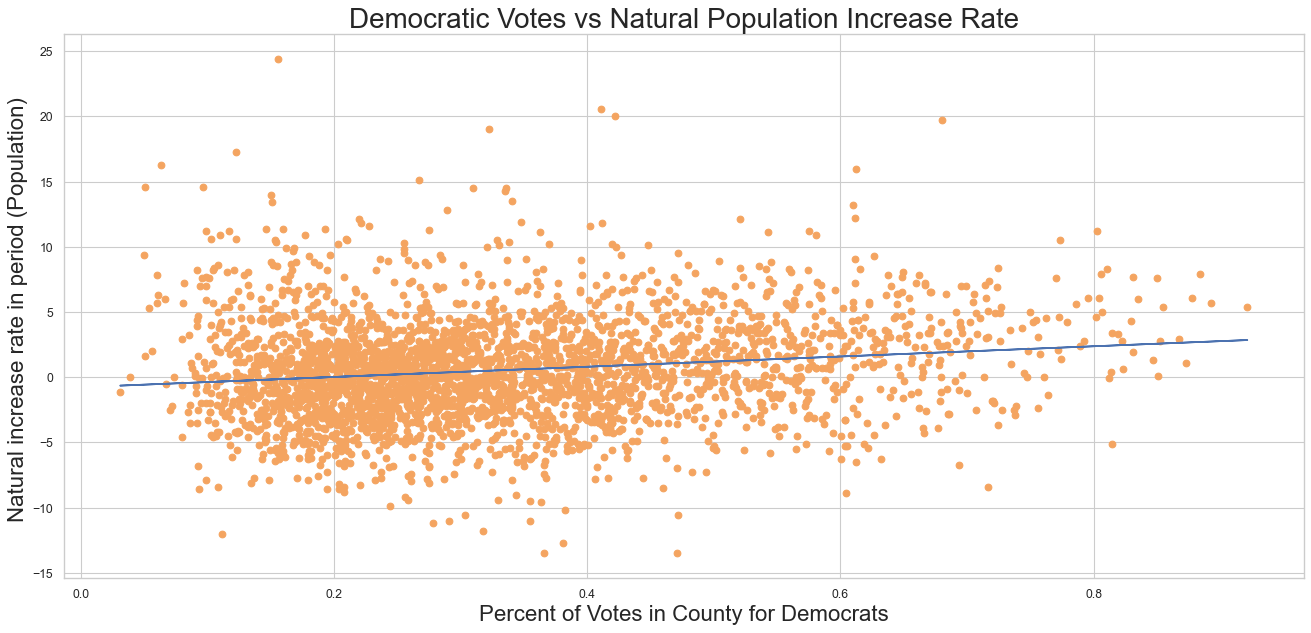

In [55]:
x = df['per_dem']
y = df['R_NATURAL_INC_2019']


fig = plt.figure()
figure(num=None, figsize=(20, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, 'o', color = 'sandybrown')
m,b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, '-')
plt.title(label= 'Democratic Votes vs Natural Population Increase Rate', fontsize=25)
plt.xlabel('Percent of Votes in County for Democrats', fontsize=20)
plt.ylabel('Natural increase rate in period (Population) ', fontsize=20)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

<Figure size 1440x648 with 0 Axes>

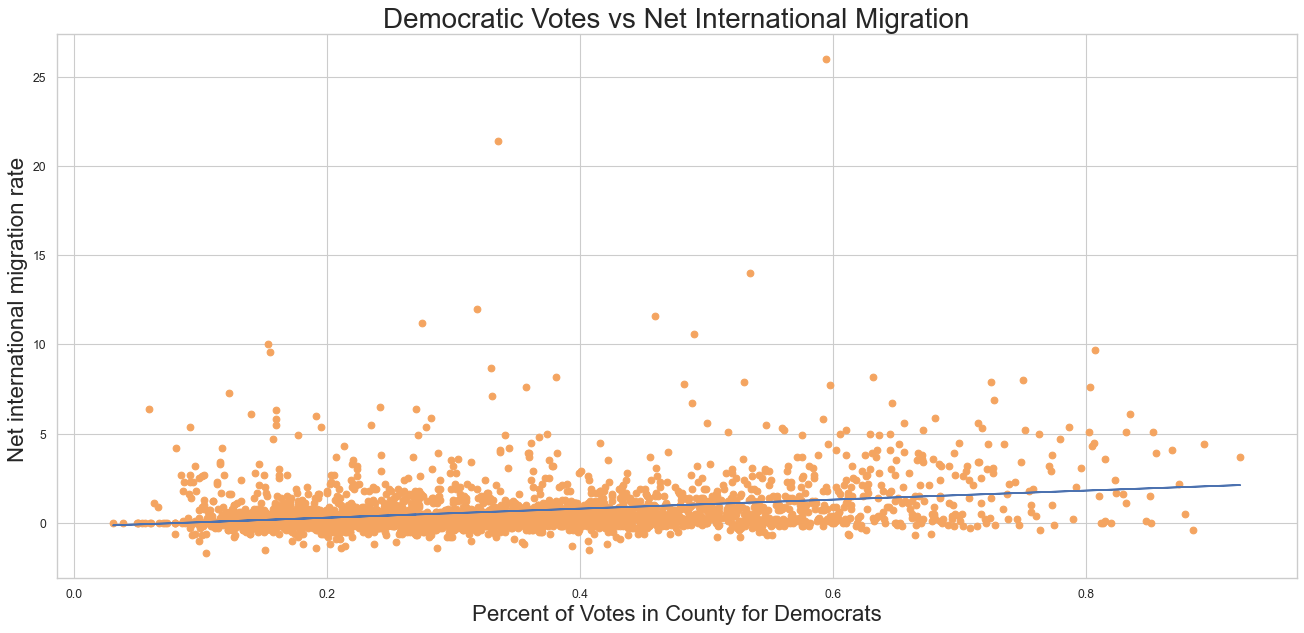

In [56]:
x = df['per_dem']
y = df['R_INTERNATIONAL_MIG_2019']


fig = plt.figure()
figure(num=None, figsize=(20, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, 'o', color = 'sandybrown')
m,b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, '-')
plt.title(label= 'Democratic Votes vs Net International Migration', fontsize=25)
plt.xlabel('Percent of Votes in County for Democrats', fontsize=20)
plt.ylabel('Net international migration rate ', fontsize=20)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

<Figure size 1440x648 with 0 Axes>

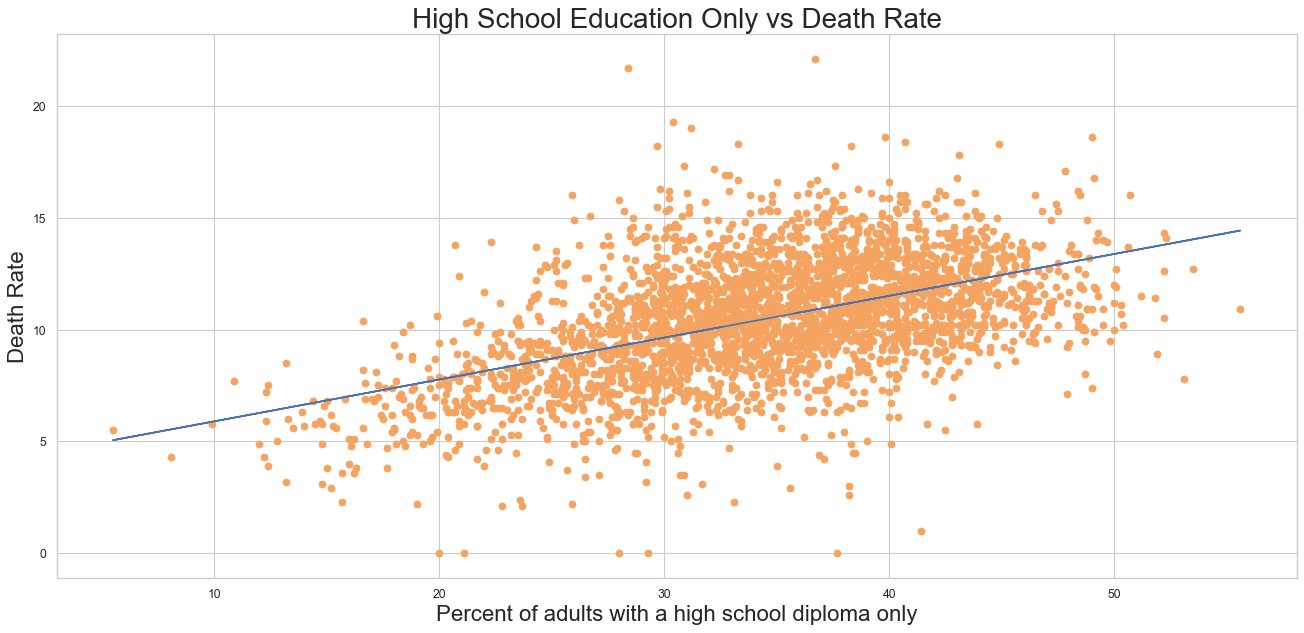

In [57]:
x = df['Percent of adults with a high school diploma only, 2014-18']
y = df['R_death_2019']


fig = plt.figure()
figure(num=None, figsize=(20, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, 'o', color = 'sandybrown')
m,b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, '-')
plt.title(label= 'High School Education Only vs Death Rate', fontsize=25)
plt.xlabel('Percent of adults with a high school diploma only', fontsize=20)
plt.ylabel('Death Rate', fontsize=20)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

<Figure size 1440x648 with 0 Axes>

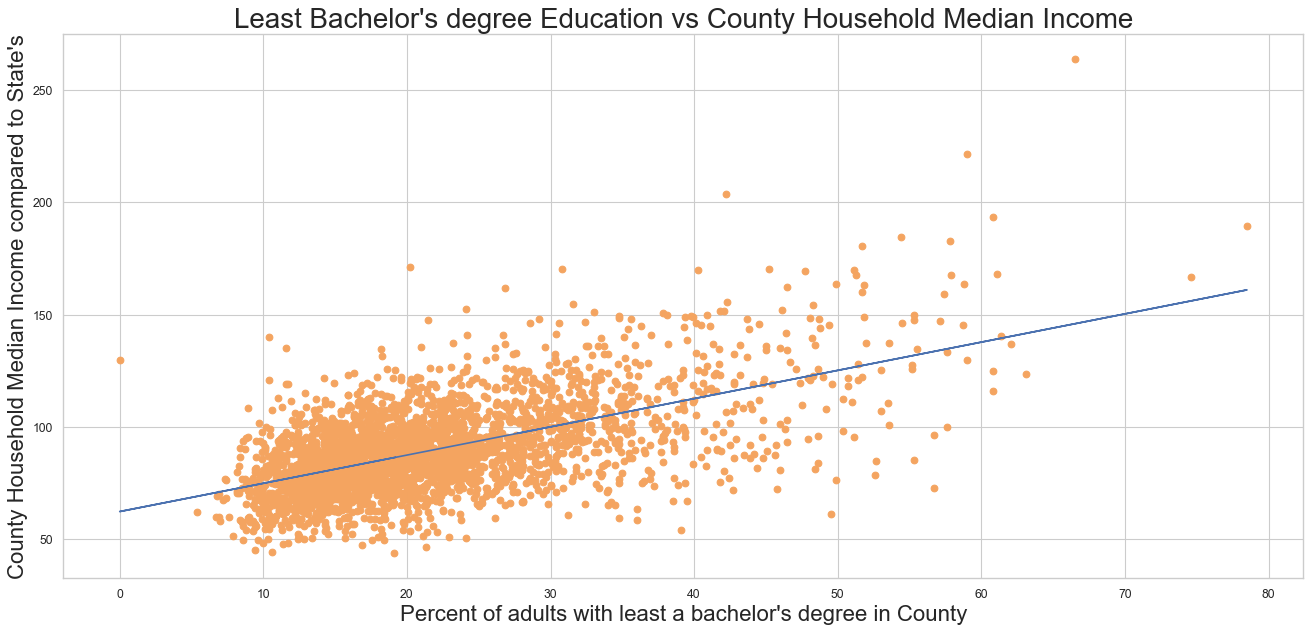

In [58]:
x = df['Percent of adults with a bachelor\'s degree or higher, 2014-18']
y = df['Med_HH_Income_Percent_of_State_Total_2018']


fig = plt.figure()
figure(num=None, figsize=(20, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, 'o', color = 'sandybrown')
m,b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, '-')
plt.title(label= 'Least Bachelor\'s degree Education vs County Household Median Income', fontsize=25)
plt.xlabel('Percent of adults with least a bachelor\'s degree in County', fontsize=20)
plt.ylabel('County Household Median Income compared to State\'s', fontsize=20)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

<Figure size 1440x648 with 0 Axes>

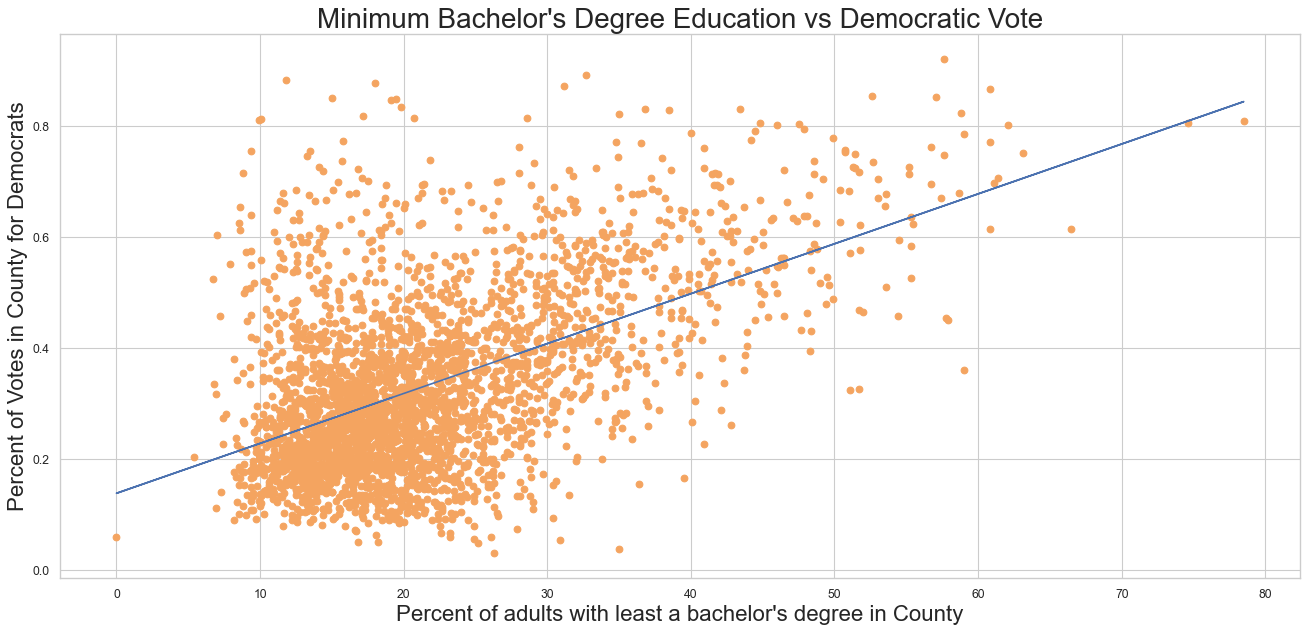

In [59]:
x = df['Percent of adults with a bachelor\'s degree or higher, 2014-18']
y = df['per_dem']


fig = plt.figure()
figure(num=None, figsize=(20, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, 'o', color = 'sandybrown')
m,b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, '-')
plt.title(label= 'Minimum Bachelor\'s Degree Education vs Democratic Vote', fontsize=25)
plt.xlabel('Percent of adults with least a bachelor\'s degree in County', fontsize=20)
plt.ylabel('Percent of Votes in County for Democrats', fontsize=20)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

<Figure size 1440x648 with 0 Axes>

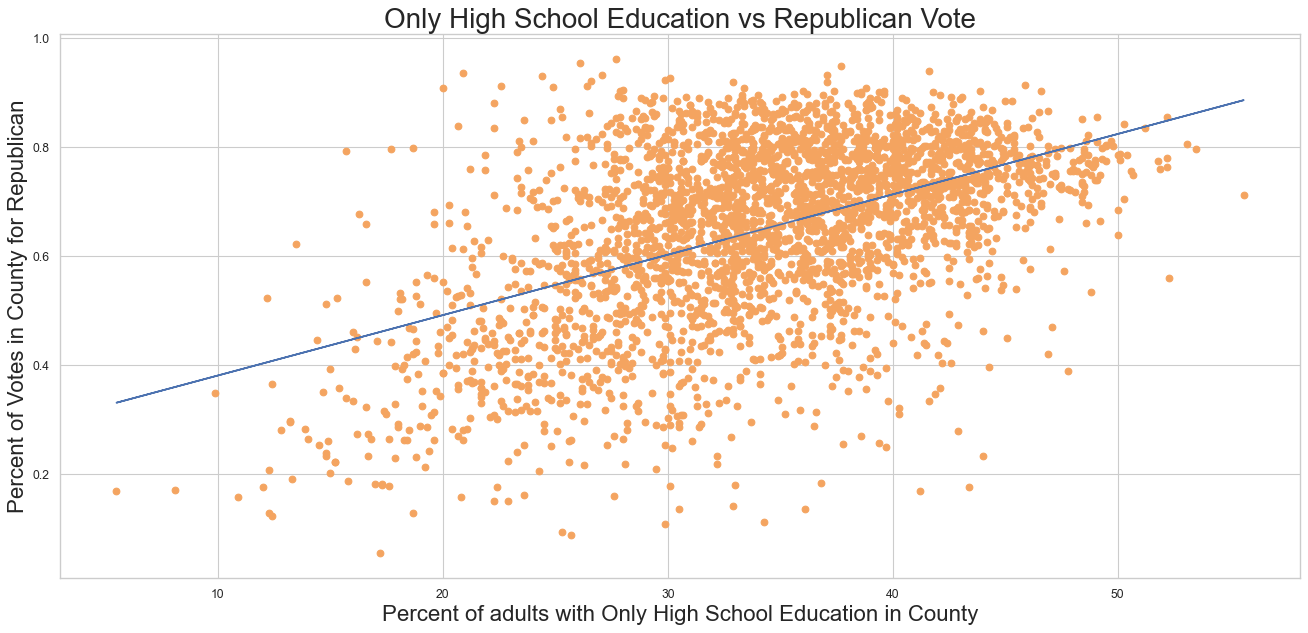

In [60]:
x = df['Percent of adults with a high school diploma only, 2014-18']
y = df['per_gop']


fig = plt.figure()
figure(num=None, figsize=(20, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, 'o', color = 'sandybrown')
m,b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, '-')
plt.title(label= 'Only High School Education vs Republican Vote', fontsize=25)
plt.xlabel('Percent of adults with Only High School Education in County', fontsize=20)
plt.ylabel('Percent of Votes in County for Republican', fontsize=20)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

<Figure size 1440x648 with 0 Axes>

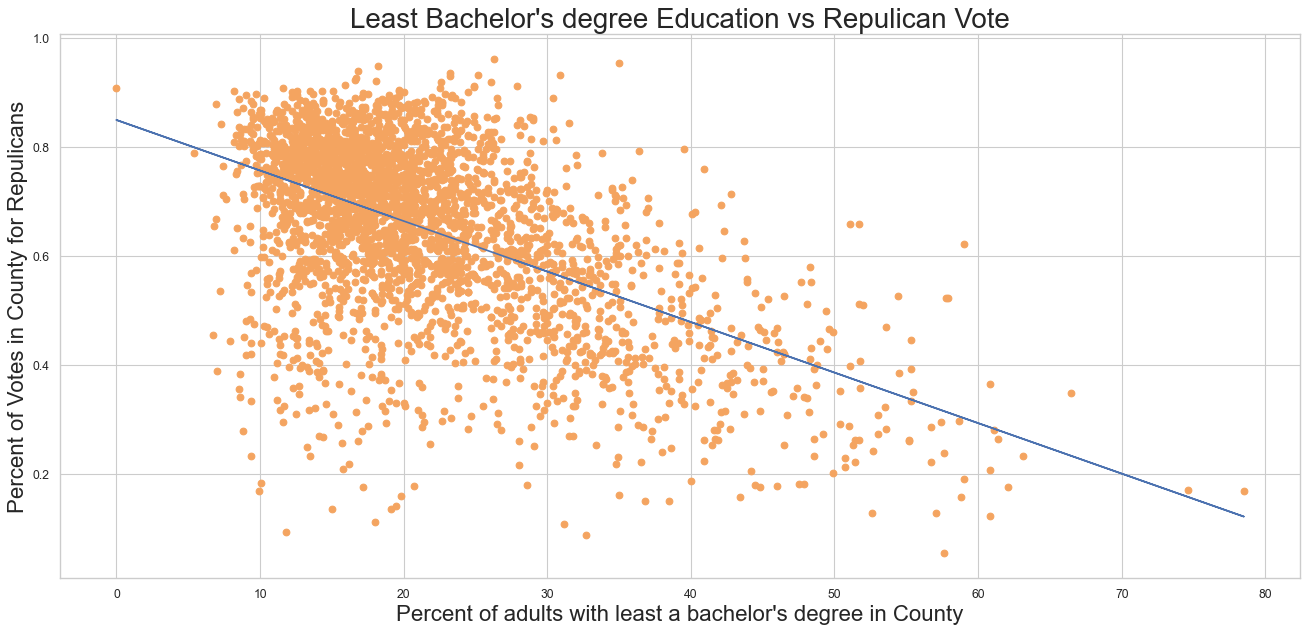

In [61]:
x = df['Percent of adults with a bachelor\'s degree or higher, 2014-18']
y = df['per_gop']


fig = plt.figure()
figure(num=None, figsize=(20, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, 'o', color = 'sandybrown')
m,b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, '-')
plt.title(label= 'Least Bachelor\'s degree Education vs Repulican Vote', fontsize=25)
plt.xlabel('Percent of adults with least a bachelor\'s degree in County', fontsize=20)
plt.ylabel('Percent of Votes in County for Repulicans', fontsize=20)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

Let's create histograms to see the distribution of voting percentages per counties.

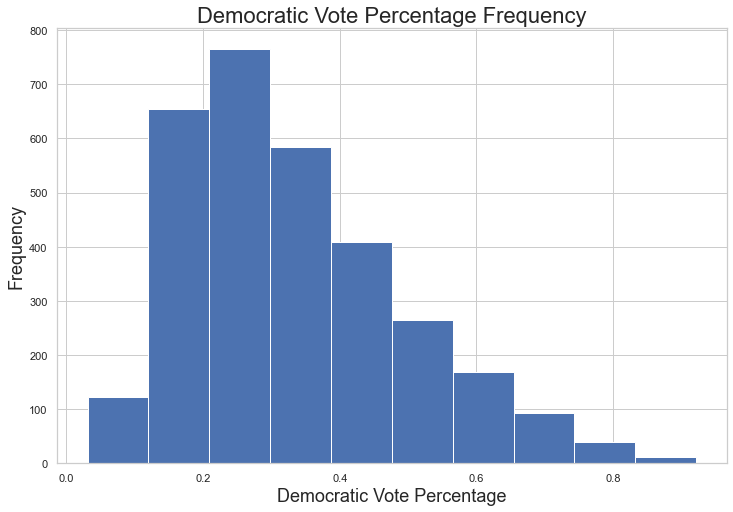

In [62]:
fig, ax = plt.subplots(figsize=(12,8))
df['per_dem'].plot(kind='hist', ax=ax)
plt.xlabel('Democratic Vote Percentage', size = 18)
plt.ylabel('Frequency', size = 18)
plt.title('Democratic Vote Percentage Frequency', size = 22)
plt.show()

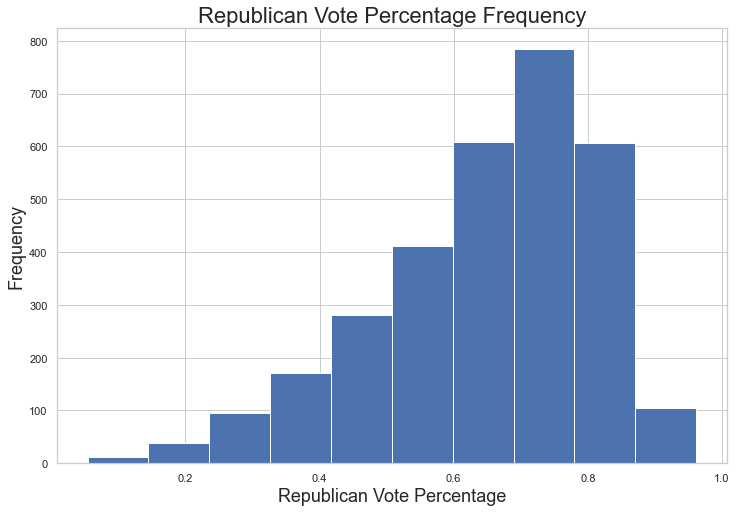

In [63]:
fig, ax = plt.subplots(figsize=(12,8))
df['per_gop'].plot(kind='hist', ax=ax)
plt.xlabel('Republican Vote Percentage', size = 18)
plt.ylabel('Frequency', size = 18)
plt.title('Republican Vote Percentage Frequency', size = 22)
plt.show()

We can see, analyzing per county level, Republicans have the greater percentage of votes the majority of the time with 70% being the most frequently occuring percentage! With Democrats winning the majority of the popular vote nation wide, that shows that Democrats obtain the majority of their votes in heavily populated cities which confirms our correlation analysis from earlier.

Let's plot some box plots of some indicators to analyze for outliers. Let's start with unemployment.

<AxesSubplot:>

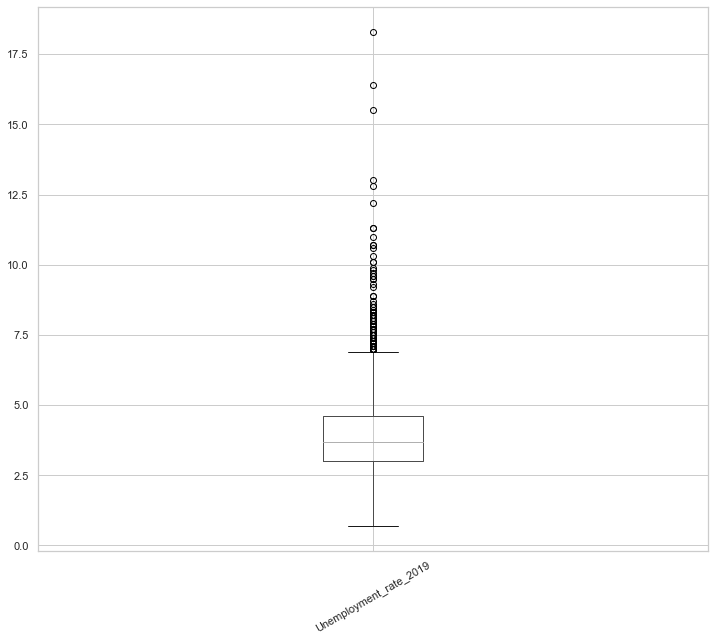

In [64]:
df.boxplot('Unemployment_rate_2019', rot = 30, figsize=(12,10))

Average Unemployment rate is amount 4%. The highest rate is about 18% which is a significant outlier. Let's see what county that is.

In [65]:
df.loc[df['Unemployment_rate_2019'] == df['Unemployment_rate_2019'].max()]

,state_name,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,FIPS Code,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Unemployment_rate_2019,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,POP_ESTIMATE_2019,N_POP_CHG_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_NET_MIG_2019,POVALL_2019,PCTPOVALL_2019,MEDHHINC_2019,County Winner_Democrat,County Winner_Republican
209,California,Imperial County,20847,34678,56718,-13831,0.367555,0.611411,-0.243856,6025.0,31.0,24.5,14.5,18.3,46633.0,62.0,181215.0,-308.0,5.9,9.1,0.2,-10.8,38020.0,22.0,48102.0,1,0


Imperial County at 18.3%. That makes sense as that's a county in the desert. We see their education level is below the country average and their population is very low. Their death rate is surprisingly low as we saw earlier that there is a moderate correlation in Unemployment_rate_2019 and R_death_2019. Guess it is a relatively safe county.

Let's see which county has the lowest unemployment.

In [66]:
df.loc[df['Unemployment_rate_2019'] == df['Unemployment_rate_2019'].min()]

,state_name,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,FIPS Code,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Unemployment_rate_2019,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,POP_ESTIMATE_2019,N_POP_CHG_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_NET_MIG_2019,POVALL_2019,PCTPOVALL_2019,MEDHHINC_2019,County Winner_Democrat,County Winner_Republican
2683,Texas,Loving County,60,4,66,56,0.909091,0.060606,0.848485,48301.0,22.7,20.0,0.0,0.7,78637.0,129.7,169.0,21.0,0.0,6.3,0.0,126.2,12.0,7.1,88487.0,0,1


Loving County at 0.7%. We can see that they are very unpopulated with only 169 people. They must have a lack of supply of workers potentially with lots of retirees.

Let's quickly analyze death rates now before going into our models.

<AxesSubplot:>

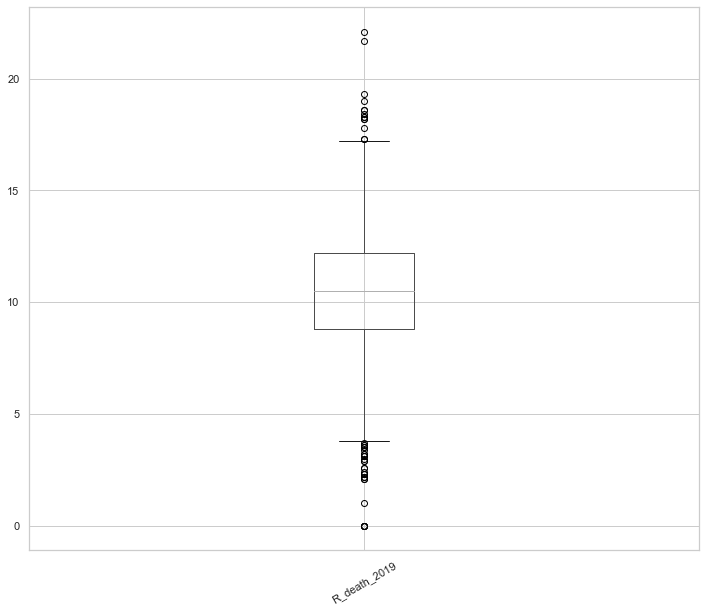

In [67]:
df.boxplot('R_death_2019', rot = 30, figsize=(12,10))

We can see the average death rate hovering slightly above 10%. The highest outlier is about 22%. Let's see what county that is.

In [68]:
df.loc[df['R_death_2019'] == df['R_death_2019'].max()]

,state_name,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,FIPS Code,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Unemployment_rate_2019,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,POP_ESTIMATE_2019,N_POP_CHG_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_NET_MIG_2019,POVALL_2019,PCTPOVALL_2019,MEDHHINC_2019,County Winner_Democrat,County Winner_Republican
1767,Nevada,Mineral County,1423,829,2335,594,0.609422,0.355032,0.25439,32021.0,12.9,36.7,14.4,4.0,44438.0,75.7,4505.0,-39.0,22.1,-9.5,0.0,1.1,708.0,15.9,43771.0,0,1


I wonder what goes on in Mineral County to have such a high death rate as we see the outlier is far from the mean.

Let's see which county has the lowest death rate which is 0%.

In [69]:
df.loc[df['R_death_2019'] == df['R_death_2019'].min()]

,state_name,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,FIPS Code,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Unemployment_rate_2019,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,POP_ESTIMATE_2019,N_POP_CHG_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_NET_MIG_2019,POVALL_2019,PCTPOVALL_2019,MEDHHINC_2019,County Winner_Democrat,County Winner_Republican
1749,Nebraska,Thomas County,377,45,427,332,0.882904,0.105386,0.777518,31171.0,7.5,29.3,24.0,3.5,48275.0,80.8,722.0,8.0,0.0,8.4,0.0,4.2,100.0,13.9,51401.0,0,1
2043,North Dakota,Slope County,380,44,427,336,0.889930,0.103044,0.786885,38087.0,10.7,28.0,26.5,2.3,49843.0,76.4,750.0,-11.0,0.0,10.6,1.3,-25.1,101.0,13.5,52695.0,0,1
2663,Texas,Kenedy County,127,65,194,62,0.654639,0.335052,0.319588,48261.0,66.3,21.1,6.8,3.6,42153.0,69.5,404.0,-33.0,0.0,14.3,21.4,-92.7,57.0,14.2,46132.0,0,1
2667,Texas,King County,151,8,159,143,0.949686,0.050314,0.899371,48269.0,14.5,37.7,18.2,2.1,57925.0,95.5,272.0,-4.0,0.0,14.6,0.0,-29.2,30.0,11.0,71256.0,0,1
2683,Texas,Loving County,60,4,66,56,0.909091,0.060606,0.848485,48301.0,22.7,20.0,0.0,0.7,78637.0,129.7,169.0,21.0,0.0,6.3,0.0,126.2,12.0,7.1,88487.0,0,1


Interesting how these 5 counties do not have any deaths but if we look closer at the POP_ESTIMATE_2019, we can see they each have a population of 750 or less so that makes more sense if no one died during the year. Or these small towns didn't report the statistic. We also see Loving County again!

## Logistic Regression Model

Time to apply what we've learned so far and build a Logistic Regression Model! Let's utilize the correlations we saw in the previous section and try to find the best fitting combination in order to predict which political party won each county.

Utilizing the variables that we saw had correlation with our dependent variable, which will be County Winner_Republican, let's use them to forecast if the county winner will be Republican or Democrat.

In [70]:
X = df[[
       'Percent of adults with a high school diploma only, 2014-18',
        'Unemployment_rate_2019', 'Median_Household_Income_2018', 'Med_HH_Income_Percent_of_State_Total_2018', 'POP_ESTIMATE_2019',  'N_POP_CHG_2019',
       'R_death_2019', 'R_NATURAL_INC_2019', 'R_INTERNATIONAL_MIG_2019', 'R_NET_MIG_2019', 'PCTPOVALL_2019', 'MEDHHINC_2019'
     ]]
X1 = sm.add_constant(X)
y = df['County Winner_Republican']

Let's split our data set into training and testing subsets for training and testing our model. We'll utilize a 75% and 25% split between training and testing subsets respectively.

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [72]:
logreg= LogisticRegressionCV(class_weight = 'balanced', solver = 'liblinear', max_iter=5000, Cs=20, cv=2)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

Let's plot a confusion matrix in order to analyze the accuracy of our model.

<AxesSubplot:>

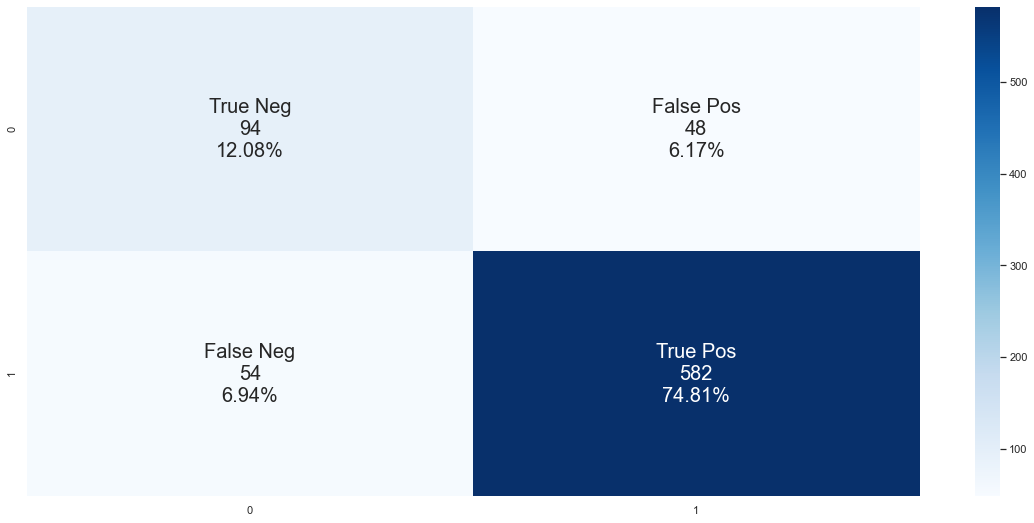

In [73]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [74]:
print("Accuracy Percent:",(metrics.accuracy_score(y_test, y_pred)*100).round(1))
print("Precision Percent:",(metrics.precision_score(y_test, y_pred)*100).round(1))
print("Recall Percent:",(metrics.recall_score(y_test, y_pred)*100).round(1))

Accuracy Percent: 86.9
Precision Percent: 92.4
Recall Percent: 91.5


Total accuracy 87% with even higher precision and recall! Very nice.

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65       142
           1       0.92      0.92      0.92       636

    accuracy                           0.87       778
   macro avg       0.78      0.79      0.78       778
weighted avg       0.87      0.87      0.87       778



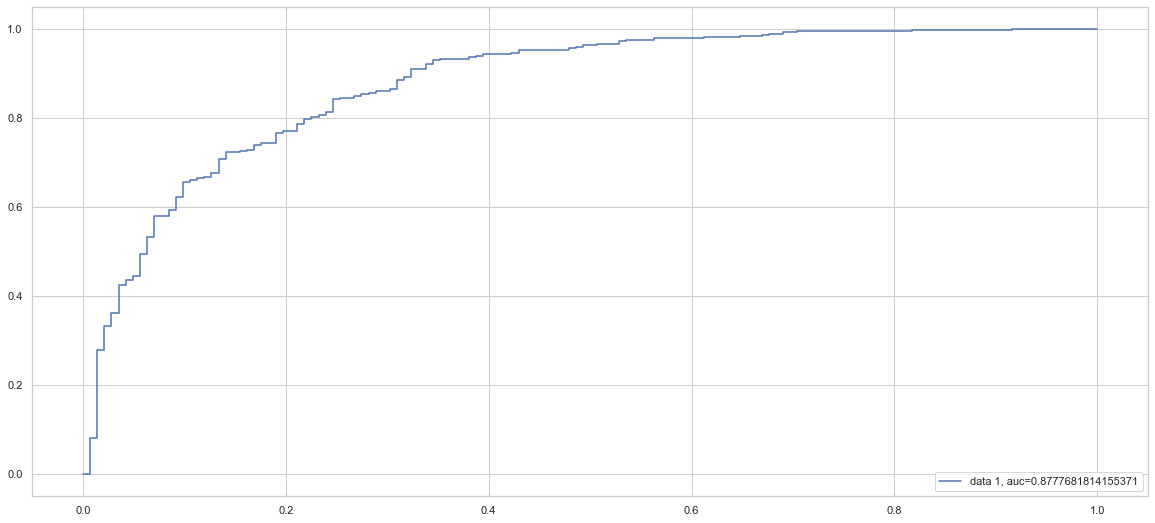

In [76]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Graphing our predictions, we see the curvy linear line which we would expect from a logistic regression data set.

Let's see which features are the most important for our model's accuracy.

Feature: 0, Score: 0.06543
Feature: 1, Score: -0.00992
Feature: 2, Score: -0.00006
Feature: 3, Score: 0.03093
Feature: 4, Score: -0.00001
Feature: 5, Score: 0.00030
Feature: 6, Score: 0.00713
Feature: 7, Score: -0.00590
Feature: 8, Score: -0.00530
Feature: 9, Score: 0.00604
Feature: 10, Score: -0.07226
Feature: 11, Score: 0.00001


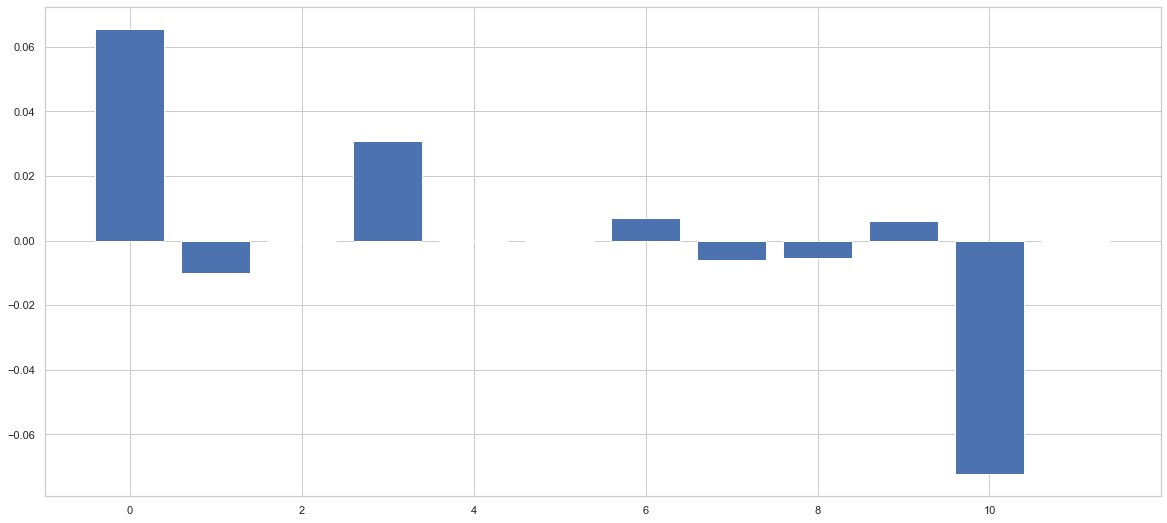

In [77]:
# get importance
importance = logreg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Our most important feature for determining our model's prediction accuracy in determining whether Republicans won the county is 'Percent of adults with a high school diploma only, 2014-18' signifying the importance of education levels in political leanings.

Let's test some criteria and use it to predict whether they'll vote for Democrats or Republicans. Let's utilize a true for all variables.

In [78]:
logreg.predict(np.array([[1,1,1,1,1,1,1,1,1,1,1,1]]))[0]

1

That leads to a Republican vote. Let's see all the predictions now.

In [79]:
predictions = logreg.predict(X_test)
print(predictions)

[1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1
 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 

Finally, let's see the percentages our model calculated in determining whether each county voted Republican.

In [80]:
logreg.predict_proba(X_test)

array([[0.36907681, 0.63092319],
       [0.29537724, 0.70462276],
       [0.20490594, 0.79509406],
       ...,
       [0.31032958, 0.68967042],
       [0.2437752 , 0.7562248 ],
       [0.99613425, 0.00386575]])

We see the percentages the model is calculating for the probability of being 0 (False) and 1 (True) respectively.

## Decision Tree Model

Now let's create a decision tree model and see how it compares to our logistic regression.

In [81]:
X_train_dt,X_test_dt,y_train_dt,y_test_dt = train_test_split(X,y,test_size=0.25, random_state=0)

In [82]:
model = tree.DecisionTreeClassifier(criterion='gini', max_leaf_nodes=10, random_state=0)

In [83]:
model.fit(X_train_dt,y_train_dt)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [84]:
y_pred_dt=model.predict(X_test_dt)

In [85]:
print("Accuracy Percent:",(metrics.accuracy_score(y_test_dt, y_pred_dt)*100).round(1))
print("Precision Percent:",(metrics.precision_score(y_test_dt, y_pred_dt)*100).round(1))
print("Recall Percent:",(metrics.recall_score(y_test_dt, y_pred_dt)*100).round(1))

Accuracy Percent: 85.6
Precision Percent: 89.9
Recall Percent: 92.8


Our Decision Tree model gave us a higher recall compared to our Logistic Regression but at the cost of lower accuracy and precision. Our Logistic Regression looks to be the best model for our data set.

In [86]:
print(classification_report(y_test_dt, y_pred_dt))

              precision    recall  f1-score   support

           0       0.62      0.54      0.58       142
           1       0.90      0.93      0.91       636

    accuracy                           0.86       778
   macro avg       0.76      0.73      0.74       778
weighted avg       0.85      0.86      0.85       778



<AxesSubplot:>

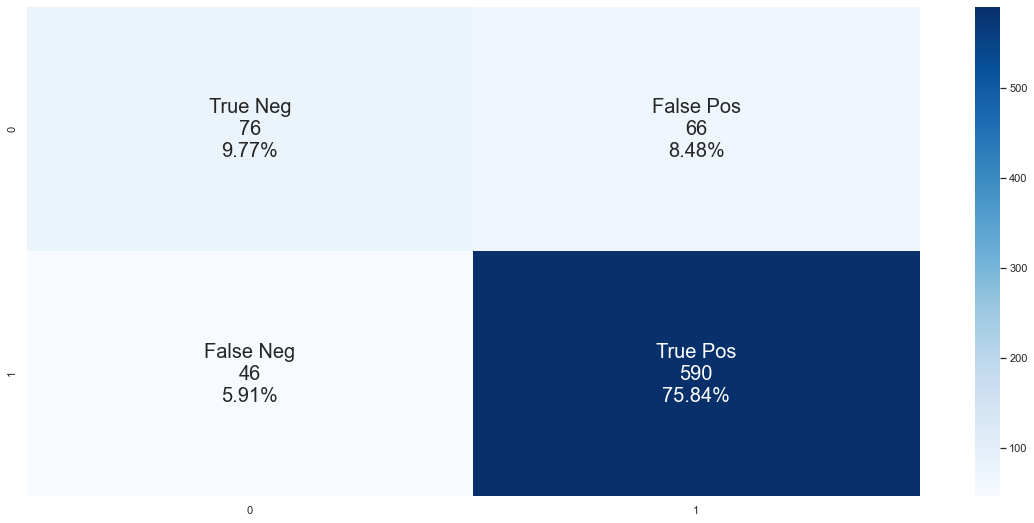

In [87]:
cf_matrix_dt = confusion_matrix(y_test_dt, y_pred_dt)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_dt.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_dt.flatten()/np.sum(cf_matrix_dt)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_dt, annot=labels, fmt='', cmap='Blues')

In [88]:
model.predict([[1,1,1,1,1,1,1,1,1,1,1,1]])

array([1], dtype=uint8)

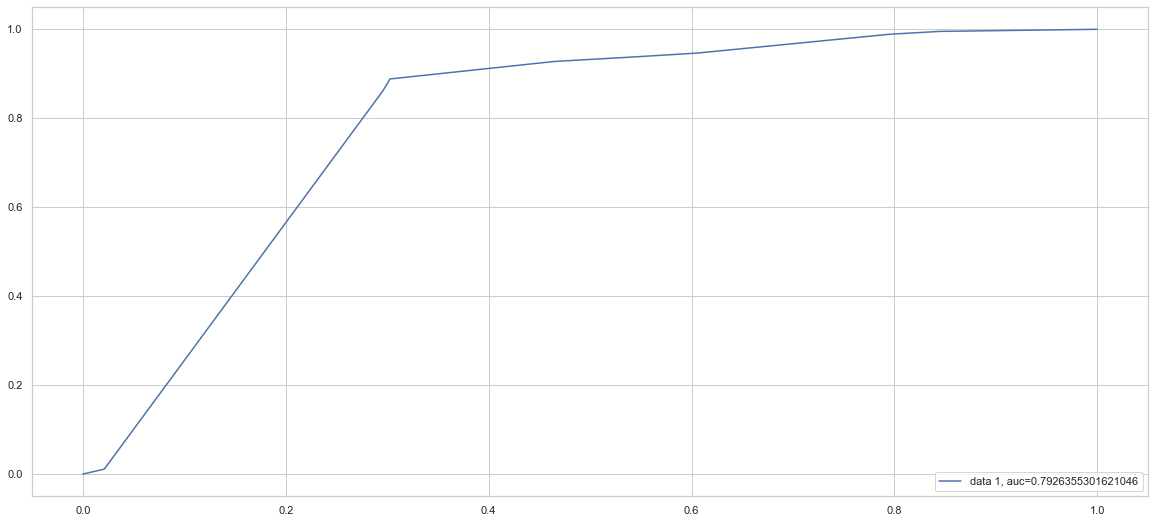

In [89]:
y_pred_dt_proba = model.predict_proba(X_test_dt)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_dt,  y_pred_dt_proba)
auc = metrics.roc_auc_score(y_test_dt, y_pred_dt_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [91]:
fi_col
fi

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature', 'Feature Importance'])
fi_df

fi_df.sort_values('Feature Importance', ascending = False).reset_index()

,index,Feature,Feature Importance
0,4,POP_ESTIMATE_2019,0.542337
1,0,"Percent of adults with a high school diploma only, 2014-18",0.204593
2,9,R_NET_MIG_2019,0.120552
3,10,PCTPOVALL_2019,0.102786
4,8,R_INTERNATIONAL_MIG_2019,0.029733
5,1,Unemployment_rate_2019,0.000000
6,2,Median_Household_Income_2018,0.000000
7,3,Med_HH_Income_Percent_of_State_Total_2018,0.000000
8,5,N_POP_CHG_2019,0.000000
9,6,R_death_2019,0.000000


## Conclusion

### Takeaway Points:

We discovered correlations between educational backgrounds with voting preferences and between educational backgrounds with economical wellbeing to name a few. We were able to build logistic regression and decision tree models that accrurately classified presidential winners for each county based on economical, educational, and social indicators. These classification models would be useful for political strategists interested in expanding their voting base by targeting demographics that are most receptive to voting for their political party and in understanding the factors that are important to them.

Thank you for taking the time to take a look through my analysis. It was a worthwhile project that allowed me to build on my statistic modeling knowledge and provided me with eye opening insights on the geopolitical diversity of our country.